In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(readxl))

# Class Lab #1 - Visualizing Distributions, Means Test and Confidence Intervals

The datasets referenced below contain room temperature measurements from 2 VAV units (VAVCO 3-06 and VAVCO 4-06) that control temperature in two zones of the SLTC building in San Leandro.  The data were extracted from the SLTC PI system. The two zones are in identical floor locations but on different floors. A question arose as to whether the mean zones temperatures were comparable which led to a study of the data.
1.	Data: VAV_3-06_4-06.xls    VAV_3-06_4-06_Stacked.xls
2.  Create a histogram and boxplot of variable RmTemp in file VAV_3-06_4-06_Stacked.xls
3.	Visually compare the room temperatures(RmTemp) of VAV 3-06 and VAV 4-06 using Histograms and Boxplots.
4.	Does the data for the VAV 3-06 unit support a hypothesis that the mean room starting temperature does not exceed 73.5 degrees?
5.	Construct a 95% confidence interval for the mean room start temperature for VAV 3-06.
6.  Based on the confidence interval in e. , would you accept or reject the hypothesis that the mean temperature is 74 degrees?

In [2]:
lab1 <- read_xlsx('../Datasets/VAV_3-06_4-06_Stacked.xlsx')
head(lab1)
str(lab1)

Start.time of VAVCO 3-06 ETF,Start.time of VAVCO 4-06 ETF,VAV,VAV Unit,RmTemp
2017-03-15 07:00:00,2017-03-15 07:01:00,Rm.Temp.VAVCO 3-06,VAVCO 3-06,73.5
2017-04-03 07:00:00,2017-04-03 07:00:00,Rm.Temp.VAVCO 3-06,VAVCO 3-06,74.0
2017-04-04 07:04:00,2017-04-04 07:04:00,Rm.Temp.VAVCO 3-06,VAVCO 3-06,73.0
2017-04-05 07:01:00,2017-04-05 07:01:00,Rm.Temp.VAVCO 3-06,VAVCO 3-06,73.0
2017-04-06 07:03:00,2017-04-06 07:08:00,Rm.Temp.VAVCO 3-06,VAVCO 3-06,73.0
2017-05-01 07:04:00,2017-05-01 07:04:00,Rm.Temp.VAVCO 3-06,VAVCO 3-06,75.0


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	118 obs. of  5 variables:
 $ Start.time of VAVCO 3-06 ETF: POSIXct, format: "2017-03-15 07:00:00" "2017-04-03 07:00:00" ...
 $ Start.time of VAVCO 4-06 ETF: POSIXct, format: "2017-03-15 07:01:00" "2017-04-03 07:00:00" ...
 $ VAV                         : chr  "Rm.Temp.VAVCO 3-06" "Rm.Temp.VAVCO 3-06" "Rm.Temp.VAVCO 3-06" "Rm.Temp.VAVCO 3-06" ...
 $ VAV Unit                    : chr  "VAVCO 3-06" "VAVCO 3-06" "VAVCO 3-06" "VAVCO 3-06" ...
 $ RmTemp                      : num  73.5 74 73 73 73 75 74.5 75 74.5 74 ...


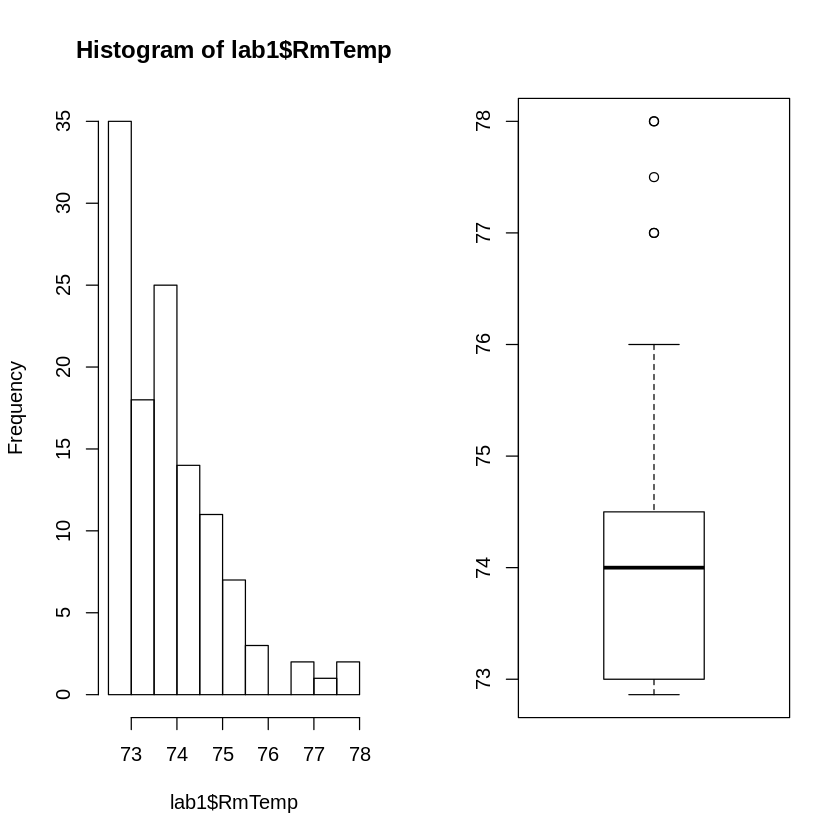

In [3]:
# b. Create a histogram and boxplot of variable RmTemp in file VAV_3-06_4-06_Stacked.xls
par(mfrow = c(1,2))
hist(lab1$RmTemp)
boxplot(lab1$RmTemp)

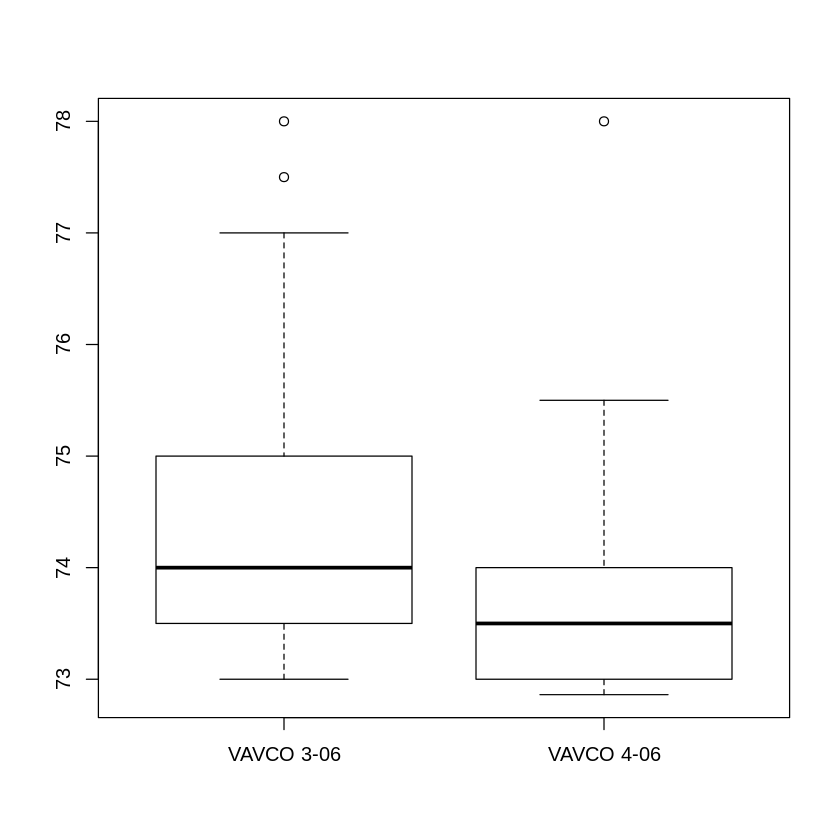

In [4]:
# c. Visually compare the room temperatures(RmTemp) of VAV 3-06 and VAV 4-06 using Histograms and Boxplots.
## Boxplot
boxplot(RmTemp ~ `VAV Unit`, data = lab1)

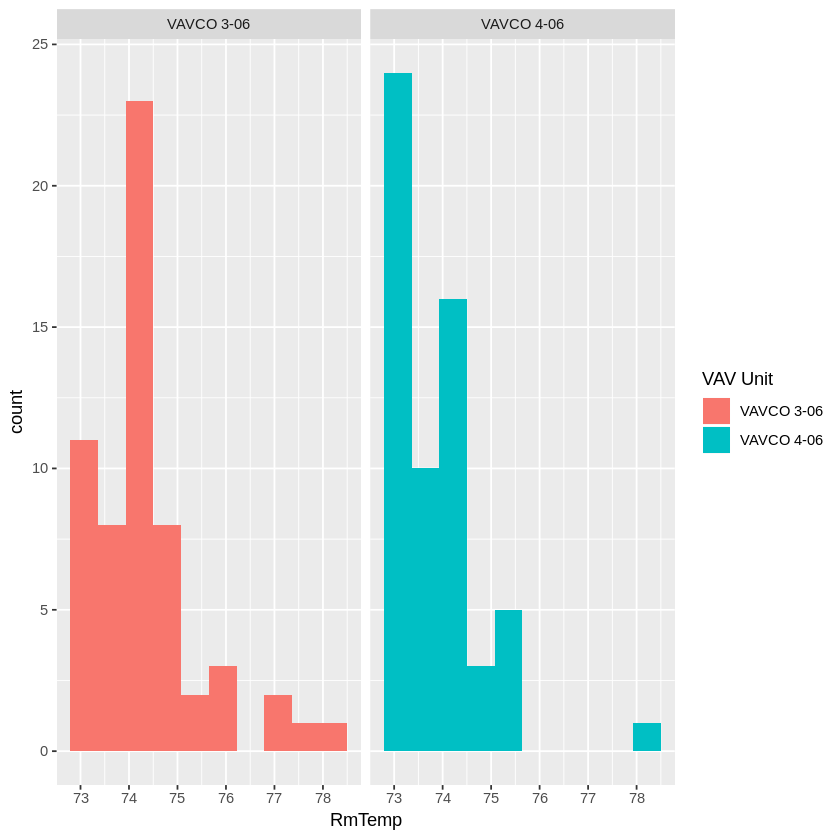

In [5]:
# c. Visually compare the room temperatures(RmTemp) of VAV 3-06 and VAV 4-06 using Histograms and Boxplots.
## Histogram using facet_grid
ggplot(lab1, aes(RmTemp)) + geom_histogram(aes(fill=`VAV Unit`), bins=10) + facet_grid(. ~ `VAV Unit`)

In [6]:
# d. Does the data for the VAV 3-06 unit support a hypothesis that the mean room starting temperature does not 
# exceed 73.5 degrees?

VAV306 <- lab1$`VAV Unit`== 'VAVCO 3-06' # Select rows for VAVCO 3-06
t.test(lab1[VAV306,]$RmTemp, mu = 73.5, alternative = 'greater') # Perform the t-test


	One Sample t-test

data:  lab1[VAV306, ]$RmTemp
t = 5.5141, df = 58, p-value = 4.244e-07
alternative hypothesis: true mean is greater than 73.5
95 percent confidence interval:
 74.08465      Inf
sample estimates:
mean of x 
 74.33898 


In [7]:
# e. Construct a 95% confidence interval for the mean room start temperature for VAV 3-06.
t.test(lab1[VAV306,]$RmTemp)


	One Sample t-test

data:  lab1[VAV306, ]$RmTemp
t = 488.58, df = 58, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 74.03442 74.64355
sample estimates:
mean of x 
 74.33898 


#### f.	Based on the confidence interval, we would reject the hypothesis that the mean temperature is 74 degrees